In [5]:
# Import necessary libraries 
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../..')
from rag_utils import token_len, load_files

In [ ]:
# Load markdown files converted from HTML files
input_dir = '../../data_out/markdown_files'
markdown_contents = load_files(input_dir, '.txt')

token_counts = []
for i, markdown_content in enumerate(markdown_contents):
    num_tokens = token_len(markdown_content['content'])
    print(f"[{i + 1}]: title: {markdown_content['title']}, tokens: {num_tokens}")
    token_counts.append(num_tokens)


In [ ]:
# Count documents with 0 tokens
zero_token_docs = sum(1 for count in token_counts if count == 0)  
print(f"Number of documents with 0 tokens: {zero_token_docs}")  

# Count documents with more than 10,000 tokens  
high_token_docs = sum(1 for count in token_counts if count > 10000)  
print(f"Number of documents with more than 10,000 tokens: {high_token_docs}") 

In [ ]:
# Display basic statistics  
print(f"Total documents: {len(token_counts)}")  
print(f"Average number of tokens: {sum(token_counts) / len(token_counts):.2f}")  
print(f"Minimum number of tokens: {min(token_counts)}")  
print(f"Maximum number of tokens: {max(token_counts)}")  

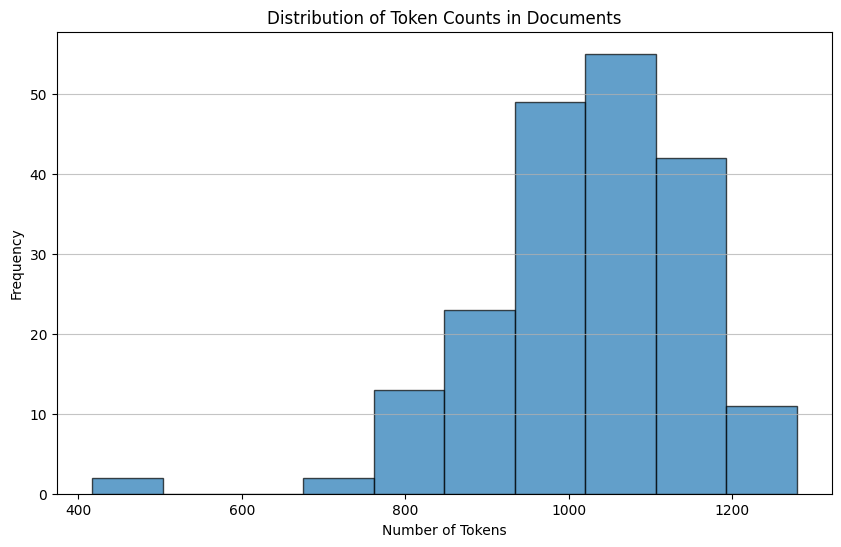

In [9]:
# Plot the distribution of token counts  
plt.figure(figsize=(10, 6))  
plt.hist(token_counts, bins=10, edgecolor='k', alpha=0.7)  
plt.title('Distribution of Token Counts in Documents')  
plt.xlabel('Number of Tokens')  
plt.ylabel('Frequency')  
plt.grid(axis='y', alpha=0.75)  
plt.show() 

In [ ]:
# Count documents with fewer than specific numbers of tokens  
count_50 = sum(1 for doc in token_counts if doc < 50)  
count_100 = sum(1 for doc in token_counts if doc < 100)  
count_150 = sum(1 for doc in token_counts if doc < 150)  
count_200 = sum(1 for doc in token_counts if doc < 200)  
count_300 = sum(1 for doc in token_counts if doc < 300)  
count_400 = sum(1 for doc in token_counts if doc < 400)  
count_500 = sum(1 for doc in token_counts if doc < 500)  
count_512 = sum(1 for doc in token_counts if doc < 512)  
count_600 = sum(1 for doc in token_counts if doc < 600)  
  
# Print the results  
print(f'There are {count_50} documents with fewer than 50 tokens.')  
print(f'There are {count_100} documents with fewer than 100 tokens.')  
print(f'There are {count_150} documents with fewer than 150 tokens.')  
print(f'There are {count_200} documents with fewer than 200 tokens.')  
print(f'There are {count_300} documents with fewer than 300 tokens.')  
print(f'There are {count_400} documents with fewer than 400 tokens.')  
print(f'There are {count_500} documents with fewer than 500 tokens.')  
print(f'There are {count_512} documents with fewer than 512 tokens.')  
print(f'There are {count_600} documents with fewer than 600 tokens.')  

In [ ]:
# Collect the counts in a DataFrame  
counts_df = pd.DataFrame({  
    'Description': [  
        'Documents with fewer than 50 tokens',  
        'Documents with fewer than 100 tokens',  
        'Documents with fewer than 150 tokens',  
        'Documents with fewer than 200 tokens',  
        'Documents with fewer than 300 tokens',  
        'Documents with fewer than 400 tokens',  
        'Documents with fewer than 500 tokens',  
        'Documents with fewer than 512 tokens',  
        'Documents with fewer than 600 tokens'  
    ],  
    'Count': [  
        count_50, count_100, count_150, count_200, count_300,   
        count_400, count_500, count_512, count_600  
    ]  
})

# Define the bins and labels  
bins = [0, 512, 1000, 2000, float('inf')]  
labels = ["0-511", "512-999", "1000-1999", "2000+"] 

# Create a DataFrame and categorize the token counts  
df = pd.DataFrame({'token_counts': token_counts})  
df['range'] = pd.cut(df['token_counts'], bins=bins, labels=labels, right=False)  
  
# Count the number of documents in each range  
range_counts = df['range'].value_counts().sort_index()  
  
# Convert to DataFrame for better display  
range_counts_df = range_counts.reset_index()  
range_counts_df.columns = ['Token Range', 'Document Count']  
  
# Concatenate the two DataFrames vertically  
combined_df = pd.concat([counts_df, range_counts_df], ignore_index=True)  
  
# Export the combined DataFrame to CSV  
csv_file_path = 'token_ranges_combined.csv'  
combined_df.to_csv(csv_file_path, index=False)  
print(f'Table exported to {csv_file_path}')  